In [2]:
import torch
from torch import nn
#
from model import IRMAE
from dataset import get_dataset
from train import test

## Load Model Checkpoint and data

In [3]:
model = IRMAE()
ckpt_path = 'ckpts/e050irmae_mnist.pt'
ckpt = torch.load(ckpt_path)
model.load_state_dict(ckpt)

<All keys matched successfully>

In [4]:
train_data, test_data = get_dataset('mnist')
criterion = nn.MSELoss()

In [5]:
print('Test loss')
test(model.to('cuda'), test_data, 0, criterion, device=torch.device('cuda'))

Test loss


100%|██████████| 157/157 [00:00<00:00, 187.96it/s]


0.0024449805867009958

In [6]:
iter_d = iter(test_data)
i1 = iter_d.next()[0][0]
i2 = iter_d.next()[0][5]

In [7]:
import matplotlib.pyplot as plt

In [8]:
def im_show(data):
    plt.axis('off')
    return plt.imshow(data.squeeze(), cmap='gray')

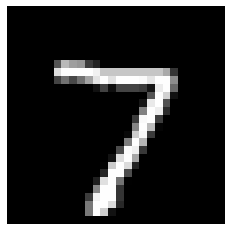

In [9]:
im_show(i1)

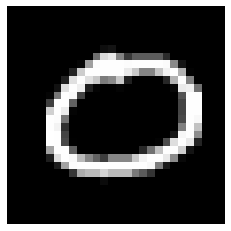

In [10]:
im_show(i2)

Directly combine two pictures

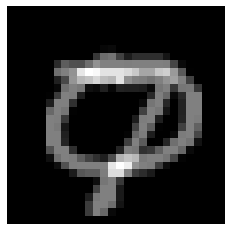

In [11]:
im_show(((i1 + i2) / 2))

In [14]:
model = model.to('cpu')

## Let's check IRMAE's effect

### extract two latent from our model

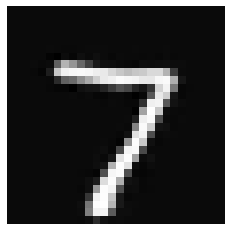

In [15]:
z1 = model.w_layers(model.encoder(i1.unsqueeze(dim=0)))
# im_show(model.decoder(z1).detach())
z2 = model.w_layers(model.encoder(i2.unsqueeze(dim=0)))
im_show(model.decoder(z1).detach())

### combine two latent with different ratio

And throw back into our decoder

In [17]:
def print_z1z2(z1, z2):
    plt.figure(figsize=(20, 10))
    for i in range(0, 10 + 1):
        r1 = (10 - i) * 0.1
        r2 = 1 - r1
#         print('ratio', r1, r2)
        z = z1 * r1 + z2 * r2

        plt.subplot(1, 11, i + 1)
        plt.title('r1={:.02}, r2={:.02}'.format(r1, r2))
        im_show(model.decoder(z).detach())
    plt.show()

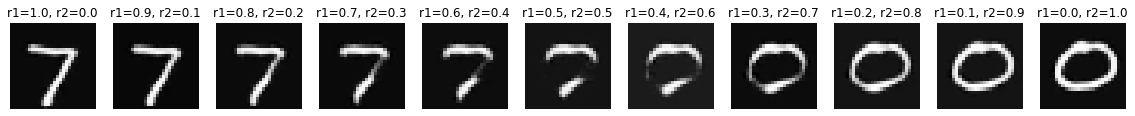

In [17]:
print_z1z2(z1, z2)

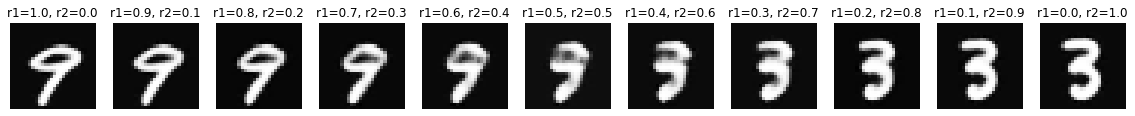

In [31]:
iter_d = iter(test_data)
dd1 = iter_d.next()[0][9].unsqueeze(dim=0)
dd2 = iter_d.next()[0][4].unsqueeze(dim=0)
zz1 = model.w_layers(model.encoder(dd1))
zz2 = model.w_layers(model.encoder(dd2))
print_z1z2(zz1, zz2)

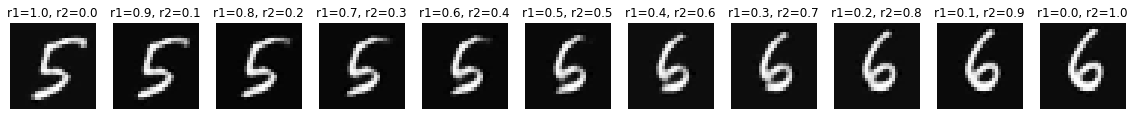

In [32]:
iter_d = iter(test_data)
dd1 = iter_d.next()[0][23].unsqueeze(dim=0)
dd2 = iter_d.next()[0][27].unsqueeze(dim=0)
zz1 = model.w_layers(model.encoder(dd1))
zz2 = model.w_layers(model.encoder(dd2))
print_z1z2(zz1, zz2)

You can see it learn more detail and proper transform between two shape(or latent)